# BIG DATA ANALYTICS: TF-Keras 101
- Tensorflow 2의 Keras API를 활용하여, 모델을 생성/훈련하는 과정에 대해서 확인해보겠습니다
- sources:
    - https://www.tensorflow.org/tutorials/quickstart/beginner
    - https://www.tensorflow.org/tutorials/keras/overfit_and_underfit
---

## 1. 라이브러리 설치 및 Import

In [51]:
import sys
!{sys.executable} -m pip uninstall -q tb-nightly tensorboard tensorflow-estimator tensorflow-gpu tf-estimator-nightly -y
# 딥러닝용 프레임워크 텐서플로우 2.0 설치
!{sys.executable} -m pip install -q tensorflow==2.0.0-rc1

In [52]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

## 2. MNIST 손글씨 데이터 셋 Load

In [53]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [54]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


## 3. 모델 정의

In [55]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),#28x28 => 784
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 4. 훈련 및 검증

In [56]:
history = model.fit(x_train, y_train, epochs=20,validation_split=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 2s 58us/sample - loss: 0.3424 - accuracy: 0.8996 - val_loss: 0.1786 - val_accuracy: 0.9476
Epoch 2/20
42000/42000 [==============================] - 2s 51us/sample - loss: 0.1658 - accuracy: 0.9507 - val_loss: 0.1312 - val_accuracy: 0.9612
Epoch 3/20
42000/42000 [==============================] - 2s 52us/sample - loss: 0.1222 - accuracy: 0.9625 - val_loss: 0.1185 - val_accuracy: 0.9645
Epoch 4/20
42000/42000 [==============================] - 2s 52us/sample - loss: 0.0990 - accuracy: 0.9693 - val_loss: 0.1057 - val_accuracy: 0.9691
Epoch 5/20
42000/42000 [==============================] - 2s 51us/sample - loss: 0.0834 - accuracy: 0.9740 - val_loss: 0.0951 - val_accuracy: 0.9718
Epoch 6/20
42000/42000 [==============================] - 2s 51us/sample - loss: 0.0710 - accuracy: 0.9774 - val_loss: 0.0909 - val_accuracy: 0.9737
Epoch 7/20
42000/42000 [==============================] 

In [57]:
model.evaluate(x_test,  y_test, verbose=2)

10000/1 - 0s - loss: 0.0435 - accuracy: 0.9785


[0.08681712514596575, 0.9785]

## Q1. 훈련을 더 많이 시키면 좋아질까?

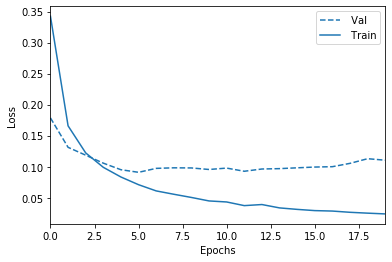

In [62]:
import matplotlib.pyplot as plt
def plot_history(histories, key='loss'):
    plt.figure()

    for name, history in histories:
        val = plt.plot(history.epoch, history.history['val_'+key],
                       '--', label=name.title()+' Val')
        plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
                 label=name.title()+' Train')

    plt.xlabel('Epochs')
    plt.ylabel(key.replace('_',' ').title())
    plt.legend()

    plt.xlim([0,max(history.epoch)])


plot_history([('', history)])

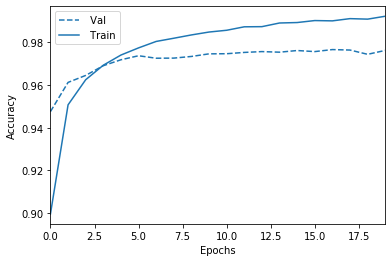

In [63]:
plot_history([('', history)],"accuracy")

In [66]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax') #만약 이진 분류라면?
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history2 = model.fit(x_train, y_train, epochs=20,validation_split=0.3)


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 68us/sample - loss: 0.3449 - accuracy: 0.9001 - val_loss: 0.1842 - val_accuracy: 0.9479
Epoch 2/20
42000/42000 [==============================] - 2s 51us/sample - loss: 0.1674 - accuracy: 0.9518 - val_loss: 0.1350 - val_accuracy: 0.9601
Epoch 3/20
42000/42000 [==============================] - 2s 50us/sample - loss: 0.1275 - accuracy: 0.9624 - val_loss: 0.1188 - val_accuracy: 0.9648
Epoch 4/20
42000/42000 [==============================] - 2s 50us/sample - loss: 0.0994 - accuracy: 0.9693 - val_loss: 0.1051 - val_accuracy: 0.9699
Epoch 5/20
42000/42000 [==============================] - 2s 50us/sample - loss: 0.0854 - accuracy: 0.9731 - val_loss: 0.0978 - val_accuracy: 0.9714
Epoch 6/20
42000/42000 [==============================] - 2s 52us/sample - loss: 0.0729 - accuracy: 0.9769 - val_loss: 0.0974 - val_accuracy: 0.9732
Epoch 7/20
42000/42000 [==============================] 

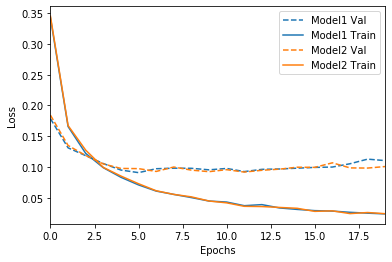

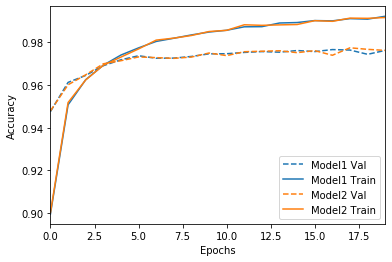

In [67]:
plot_history([('Model1', history),('Model2', history2)],"loss")
plot_history([('Model1', history),('Model2', history2)],"accuracy")

In [68]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), 
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history3 = model.fit(x_train, y_train, epochs=20,validation_split=0.3)


Train on 42000 samples, validate on 18000 samples
Epoch 1/20
42000/42000 [==============================] - 3s 62us/sample - loss: 0.3055 - accuracy: 0.9093 - val_loss: 0.1490 - val_accuracy: 0.9532
Epoch 2/20
42000/42000 [==============================] - 2s 55us/sample - loss: 0.1303 - accuracy: 0.9613 - val_loss: 0.1187 - val_accuracy: 0.9648
Epoch 3/20
42000/42000 [==============================] - 2s 55us/sample - loss: 0.0881 - accuracy: 0.9729 - val_loss: 0.1162 - val_accuracy: 0.9657
Epoch 4/20
42000/42000 [==============================] - 2s 55us/sample - loss: 0.0670 - accuracy: 0.9791 - val_loss: 0.1107 - val_accuracy: 0.9677
Epoch 5/20
42000/42000 [==============================] - 2s 57us/sample - loss: 0.0556 - accuracy: 0.9822 - val_loss: 0.1121 - val_accuracy: 0.9702
Epoch 6/20
42000/42000 [==============================] - 2s 55us/sample - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.1095 - val_accuracy: 0.9705
Epoch 7/20
42000/42000 [==============================] 

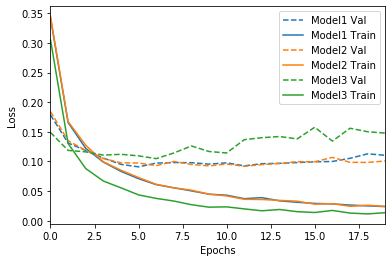

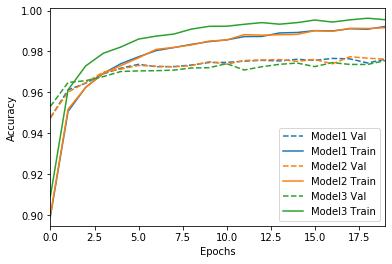

In [69]:
plot_history([('Model1', history),('Model2', history2),('Model3', history3)],"loss")
plot_history([('Model1', history),('Model2', history2),('Model3', history3)],"accuracy")